In [1]:
#importing required librabies 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import i

In [2]:
#importing the dataset
with open ('spambase_data.csv', 'w+') as file:
    for i in range(1, 58):
        file.write(str(str(i)+',').rstrip('\n'))
    file.write(str(str(58)).rstrip('\n'))
    file.write('\n')
    with open('spambase.data', 'r') as datafile:
        for line in datafile:
            file.write(line)

In [3]:
data = pd.read_csv('spambase_data.csv', delimiter = ',')

In [4]:
data

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:

#There are no missing values in the dataset.
#splitting the data sent into train and test data
training_data, testing_data  = train_test_split(data,test_size = 0.2,random_state = 0)

#with train data we will get our hypothesis which is used to predict on test data

In [6]:
#converting the data frames into lists
testing_data_input = testing_data.iloc[:,:-1].values
testing_data_output = testing_data.iloc[:,-1].values
training_data_input = training_data.iloc[:,:-1].values
training_data_output = training_data.iloc[:,-1].values
training_data_list = training_data.values.tolist()
testing_data_list = testing_data.values.tolist()
training_data_input_list = training_data_input.tolist()
training_data_output_list = training_data_output.tolist()
testing_data_input_list = testing_data_input.tolist()
testing_data_output_list = testing_data_output.tolist()

In [7]:
kbins = KBinsDiscretizer(n_bins = 7, encode='ordinal', strategy='uniform')
kbins.fit(training_data_input_list)
training_data_discretized = kbins.transform(training_data_input_list)
kbins2 = KBinsDiscretizer(n_bins= 7, encode='ordinal', strategy='uniform')
kbins2.fit(testing_data_input_list)
testing_data_input_discretized = kbins2.transform(testing_data_input_list)

In [8]:
#as there are 58 coloumns in which 57 different instances we will define our hypothesis space as 57 
h = []
for i in range(57):
    h.append([])

In [9]:
def checkval(value,li_st):
    for i in range(len(li_st)):
        if value == li_st[i]:
            return True
    return False

In [10]:
checkval(2,[])

False

In [11]:
for i in range(0,len(training_data_list)):
    if training_data_list[i][-1] == 1: #training on the positive instances
        for j in range(0,57):
            if not checkval(training_data_discretized[i][j],h[j]):
                h[j].append(training_data_discretized[i][j])

results = []

In [12]:
h

[[0.0, 1.0, 3.0, 2.0, 6.0],
 [0.0, 1.0, 2.0],
 [0.0, 1.0, 2.0, 3.0, 5.0, 4.0],
 [0.0, 1.0, 6.0, 2.0, 5.0, 3.0],
 [2.0, 0.0, 1.0, 3.0, 4.0, 5.0],
 [0.0, 1.0, 2.0],
 [0.0, 1.0, 2.0, 6.0, 5.0, 4.0, 3.0],
 [0.0, 1.0, 2.0, 6.0],
 [0.0, 1.0, 2.0, 3.0],
 [0.0, 1.0, 2.0],
 [0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0],
 [0.0, 1.0, 3.0, 2.0, 4.0],
 [0.0, 1.0, 6.0, 2.0, 3.0],
 [0.0, 1.0, 2.0, 3.0],
 [0.0, 3.0, 1.0, 2.0, 6.0],
 [1.0, 0.0, 2.0, 3.0, 5.0],
 [0.0, 1.0, 3.0, 5.0, 2.0, 4.0, 6.0],
 [0.0, 1.0, 3.0, 2.0, 4.0, 6.0],
 [0.0, 1.0, 2.0, 3.0, 4.0],
 [0.0, 1.0, 2.0, 6.0],
 [0.0, 2.0, 1.0, 3.0, 4.0, 6.0],
 [0.0, 5.0, 1.0, 3.0, 2.0, 6.0, 4.0],
 [0.0, 4.0, 1.0, 3.0, 2.0, 5.0, 6.0],
 [0.0, 1.0, 2.0, 3.0, 4.0, 6.0],
 [0.0, 1.0],
 [0.0],
 [0.0],
 [0.0, 1.0, 6.0],
 [0.0],
 [0.0, 1.0, 3.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0, 1.0],
 [0.0],
 [0.0, 1.0],
 [0.0, 1.0, 3.0],
 [0.0],
 [0.0, 1.0],
 [0.0, 1.0, 3.0, 2.0],
 [0.0],
 [0.0],
 [0.0, 1.0],
 [0.0],
 [0.0, 1.0],
 [0.0],
 [0.0, 1.0],
 [0.0],
 [0.0, 1.0],
 [0.0, 6.0, 3

In [13]:
#using hypothesis to predict on X_test
pred = []
for row in testing_data_input_discretized:
        a = 0
        b = 0
        for col in row:
            if col in h[a]:
                b += 1
            a += 1
            if a == 57: break
        if b == 57: 
            pred.append(1)
        else: pred.append(0)

In [14]:
#Evaluating our model 
from sklearn.metrics import confusion_matrix

In [15]:
print(confusion_matrix(testing_data_output_list,pred))

[[324 214]
 [110 273]]


In [16]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Accuracy is  64.82084690553745
tp is  273
tn is  324
fp is  214
fn is  324


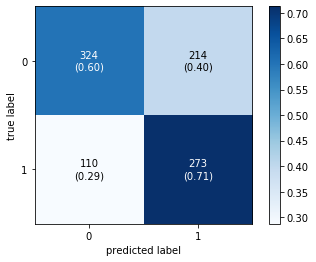

In [22]:
matrix = confusion_matrix(testing_data_output_list,pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
tn, fp, fn, tp = confusion_matrix(testing_data_output_list,pred).ravel()
print('Accuracy is ', (tn+tp)/(tn+ fp+ fn+ tp)*100)
print('tp is ',tp)
print('tn is ',tn)
print('fp is ',fp)
print('fn is ',tn)
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(testing_data_output_list, pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       538
           1       0.56      0.71      0.63       383

    accuracy                           0.65       921
   macro avg       0.65      0.66      0.65       921
weighted avg       0.67      0.65      0.65       921

